## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [100]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [101]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [102]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])


#### Plot X vs. y

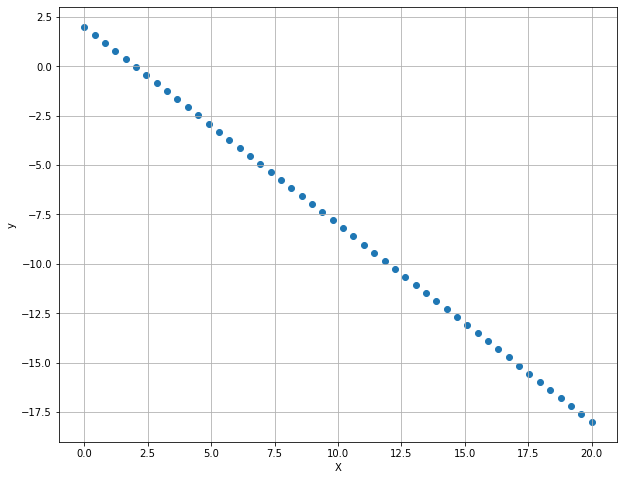

In [103]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [104]:
def adagrad(X, y, alpha, epsilon, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        v_0 = v_0 + d_theta_0**2
        v_1 = v_1 + d_theta_1**2

        theta_0 = theta_0 - ( alpha / ( np.sqrt(v_0) + epsilon ) * d_theta_0 )
        theta_1 = theta_1 - ( alpha / ( np.sqrt(v_1) + epsilon ) * d_theta_1 )

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [105]:
alpha = 0.05
epsilon = 1e-08
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = adagrad(X, y, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
****************** Epoch 129 ********************

h(x): [ -0.63675658  -0.92470532  -1.21265406  -1.5006028   -1.78855154
  -2.07650028  -2.36444901  -2.65239775  -2.94034649  -3.22829523
  -3.51624397  -3.80419271  -4.09214145  -4.38009018  -4.66803892
  -4.95598766  -5.2439364   -5.53188514  -5.81983388  -6.10778261
  -6.39573135  -6.68368009  -6.97162883  -7.25957757  -7.54752631
  -7.83547505  -8.12342378  -8.41137252  -8.69932126  -8.98727
  -9.27521874  -9.56316748  -9.85111622 -10.13906495 -10.42701369
 -10.71496243 -11.00291117 -11.29085991 -11.57880865 -11.86675738
 -12.15470612 -12.44265486 -12.7306036  -13.01855234 -13.30650108
 -13.59444982 -13.88239855 -14.17034729 -14.45829603 -14.74624477]

Error Vector:
 [-2.63675658 -2.51654206 -2.39632753 -2.276113   -2.15589848 -2.03568395
 -1.91546942 -1.7952549  -1.67504037 -1.55482584 -1.43461131 -1.31439679
 -1.19418226 -1.07396773 -0.95375321 -0.83353868 -0.71332415 -0.59310963

In [106]:
from sklearn.metrics import r2_score

h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9484638125790851


In [107]:
def plot_loss_epoch(loss, alpha):
    plt.figure(figsize=(10, 8))
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.figure(figsize=(10, 8))
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_lines(X, y, hypothesis):
    plt.figure(figsize=(10, 8))
    for h in hypothesis:
        plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

def plot_best_line(X, y, h):
    plt.figure(figsize=(10, 8))
    plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

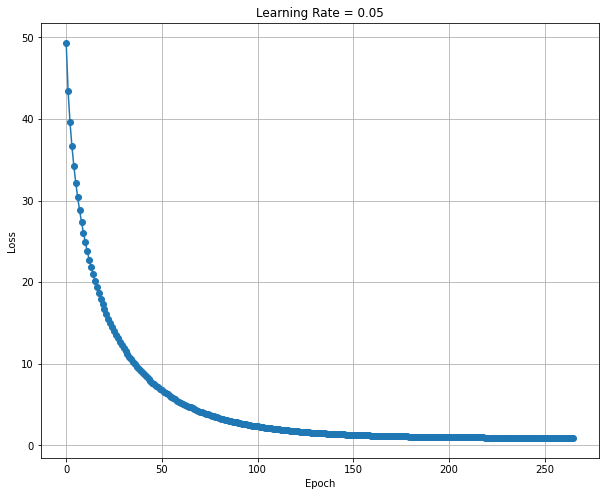

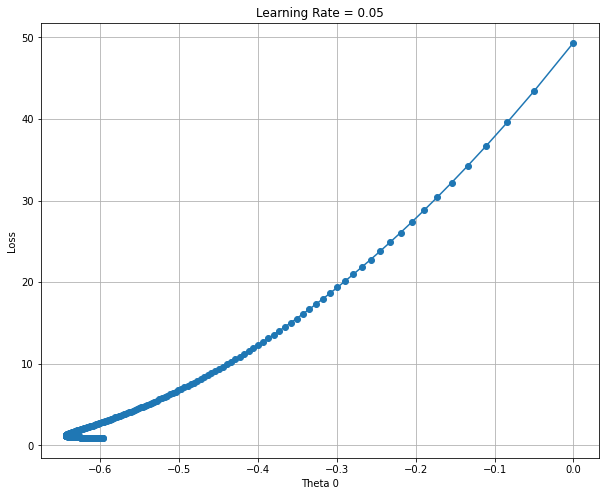

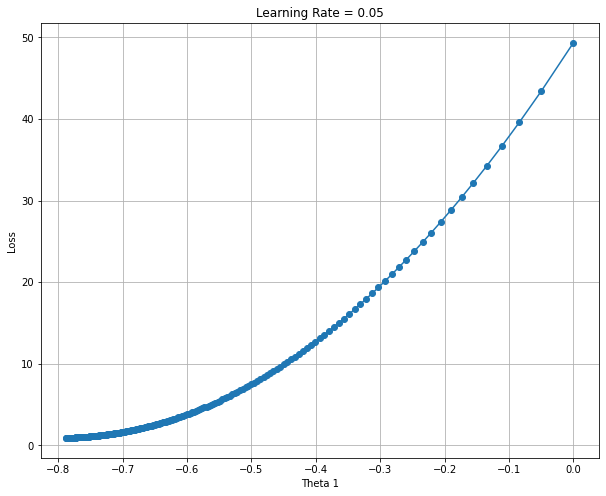

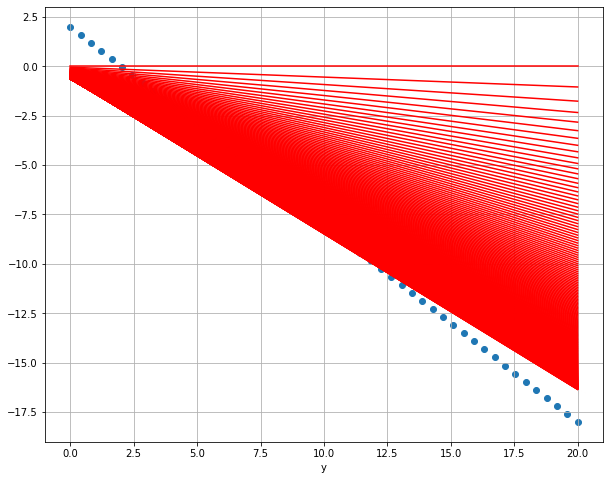

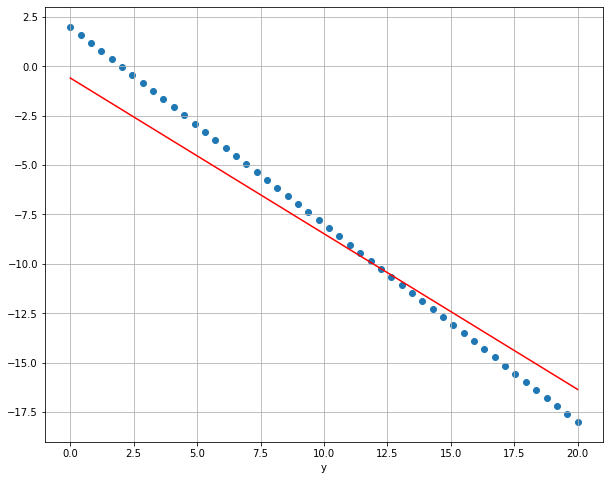

In [108]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [109]:
alpha = 0.005
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = adagrad(X, y, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
 -1.81076438e+00 -1.62958382e+00 -1.44840326e+00 -1.26722270e+00
 -1.08604213e+00 -9.04861570e-01 -7.23681007e-01 -5.42500445e-01
 -3.61319882e-01 -1.80139319e-01  1.04124330e-03  1.82221806e-01
  3.63402369e-01  5.44582931e-01  7.25763494e-01  9.06944056e-01
  1.08812462e+00  1.26930518e+00  1.45048574e+00  1.63166631e+00
  1.81284687e+00  1.99402743e+00  2.17520799e+00  2.35638856e+00
  2.53756912e+00  2.71874968e+00  2.89993025e+00  3.08111081e+00
  3.26229137e+00  3.44347193e+00  3.62465250e+00  3.80583306e+00
  3.98701362e+00  4.16819418e+00  4.34937475e+00  4.53055531e+00
  4.71173587e+00  4.89291643e+00  5.07409700e+00  5.25527756e+00
  5.43645812e+00  5.61763868e+00  5.79881925e+00  5.97999981e+00
  6.16118037e+00  6.34236093e+00]

j =  5.229585005200786

Gradient Vector:
 [[ 1.90343715]
 [34.43471933]]

Gradient Vector Norm:
 34.48728705418657

theta_0_new -0.535521372824344
theta_1_new -0.5561483628683177

****************** 

In [110]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7095974929894115


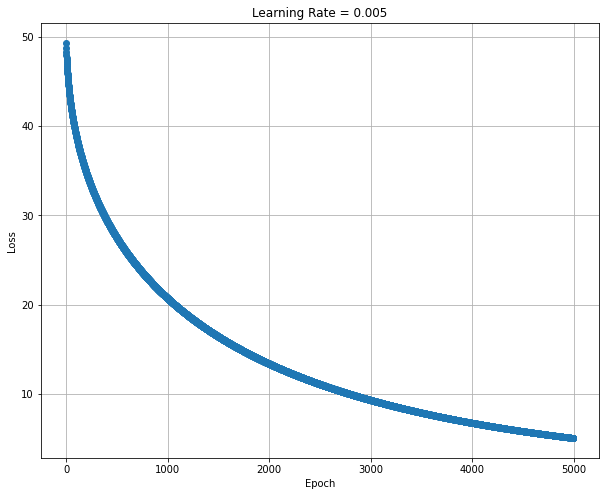

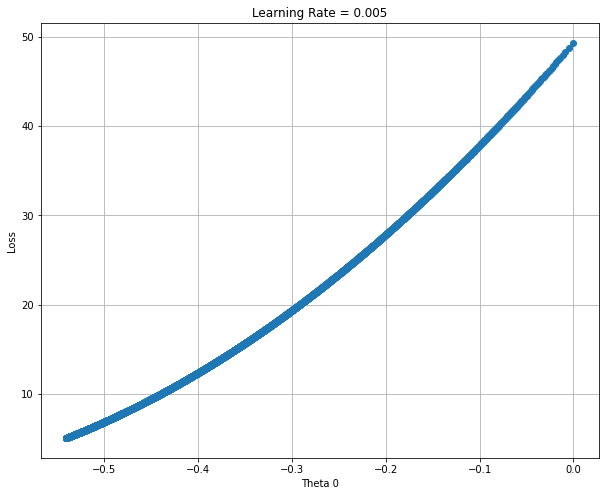

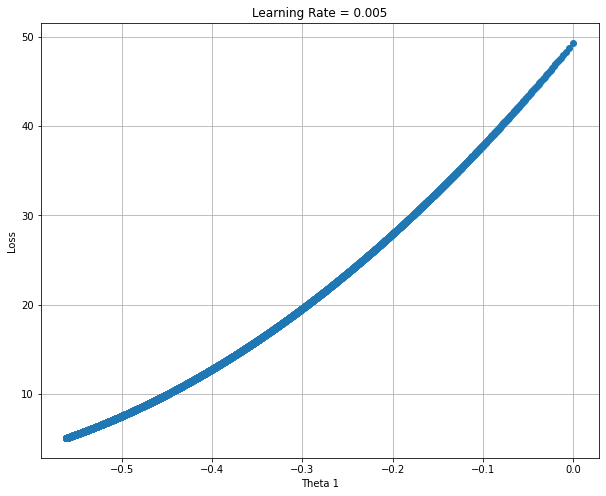

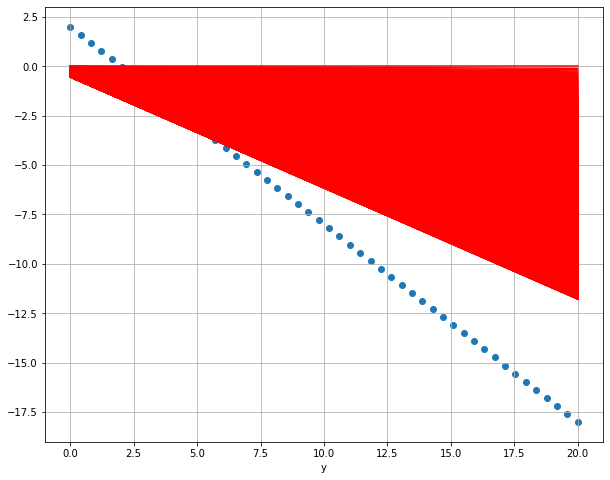

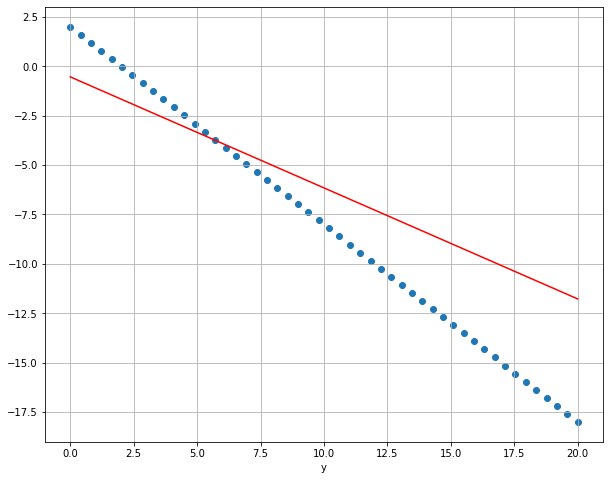

In [111]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [112]:
alpha = 0.0005
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = adagrad(X, y, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
 -0.96315326 -0.98482283 -1.00649241 -1.02816198 -1.04983156 -1.07150113
 -1.0931707  -1.11484028]

Error Vector:
 [-2.05303115 -1.66653746 -1.28004377 -0.89355008 -0.50705639 -0.1205627
  0.265931    0.65242469  1.03891838  1.42541207  1.81190576  2.19839945
  2.58489314  2.97138683  3.35788053  3.74437422  4.13086791  4.5173616
  4.90385529  5.29034898  5.67684267  6.06333637  6.44983006  6.83632375
  7.22281744  7.60931113  7.99580482  8.38229851  8.7687922   9.1552859
  9.54177959  9.92827328 10.31476697 10.70126066 11.08775435 11.47424804
 11.86074174 12.24723543 12.63372912 13.02022281 13.4067165  13.79321019
 14.17970388 14.56619757 14.95269127 15.33918496 15.72567865 16.11217234
 16.49866603 16.88515972]

j =  43.05292374678548

Gradient Vector:
 [[  7.41606428]
 [107.01260661]]

Gradient Vector Norm:
 107.26926858670956

theta_0_new -0.05304009487933245
theta_1_new -0.05309941984326829

****************** Epoch 2966 **********

In [113]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  -1.4736441832884104


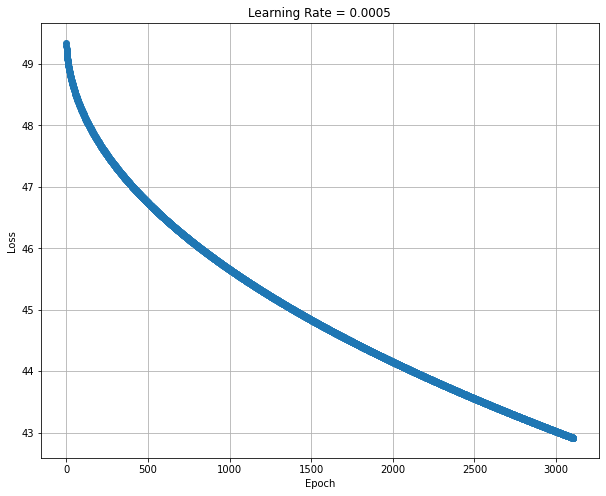

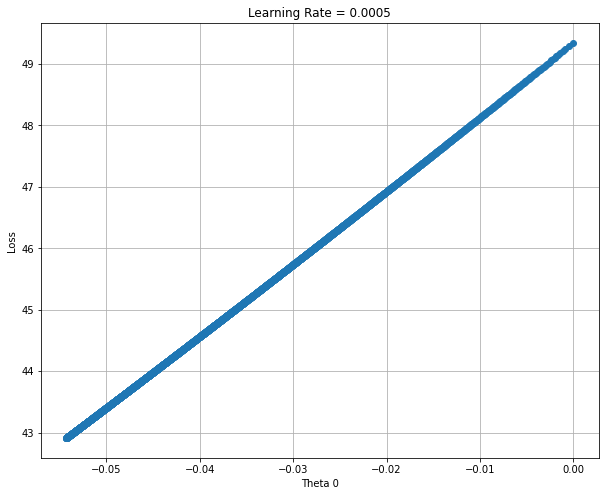

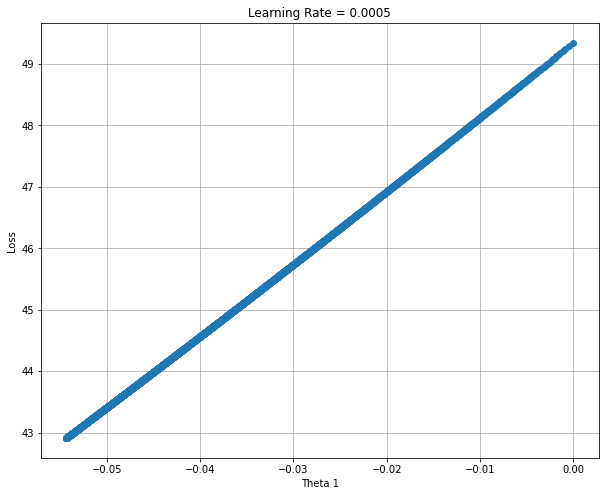

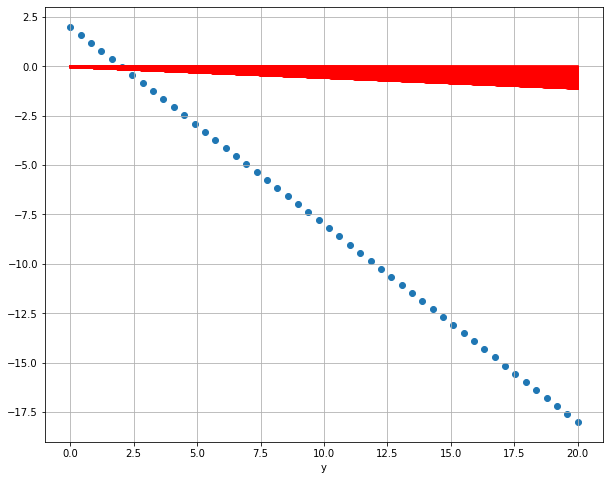

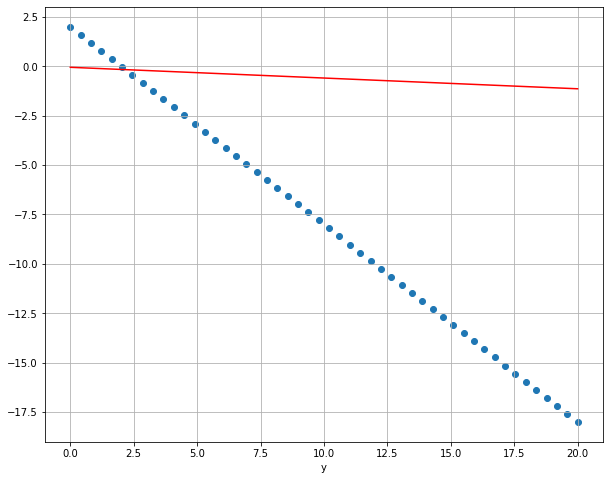

In [114]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [115]:
def RMSProp(X, y, beta, alpha, epsilon, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        v_0 = (beta*v_0) + ((1-beta) * (d_theta_0**2))
        v_1 = (beta*v_1) + ((1-beta) * (d_theta_1**2))

        theta_0 = theta_0 - ( alpha / ( np.sqrt(v_0) + epsilon ) * d_theta_0 )
        theta_1 = theta_1 - ( alpha / ( np.sqrt(v_1) + epsilon ) * d_theta_1 )

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [116]:
alpha = 0.05
beta = 0.9
epsilon = 1e-08
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = RMSProp(X, y, beta, alpha, epsilon, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new -0.158113882383419
theta_1_new -0.

In [117]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9993602095484933


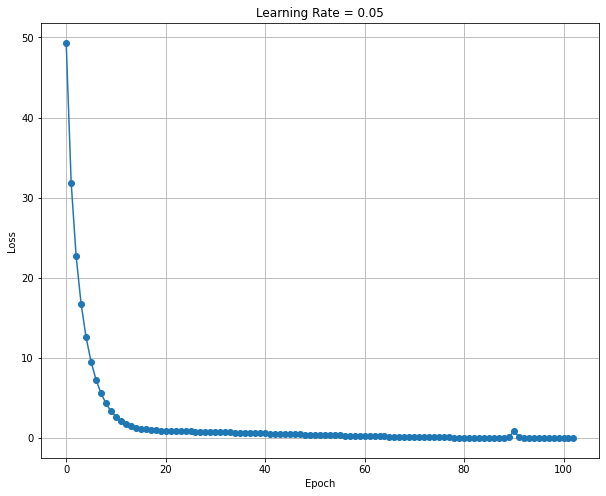

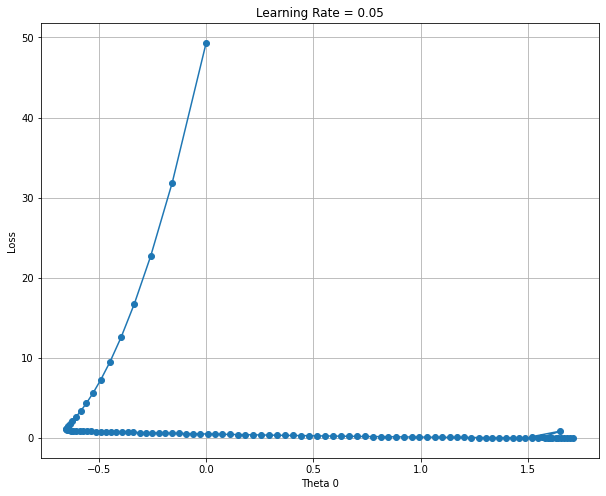

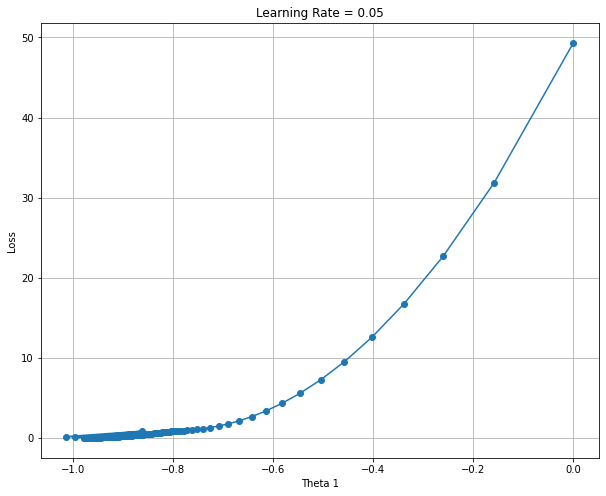

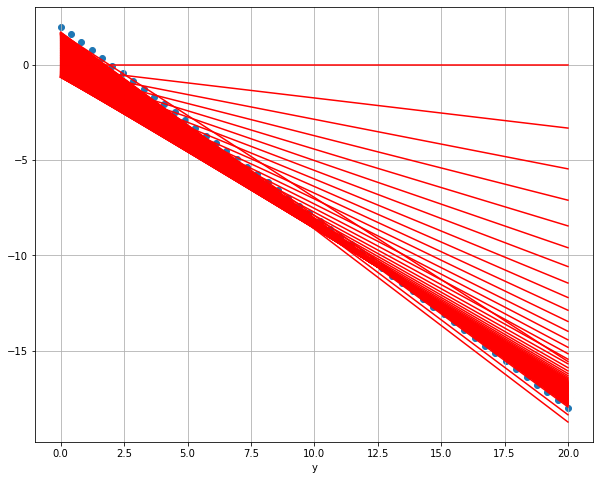

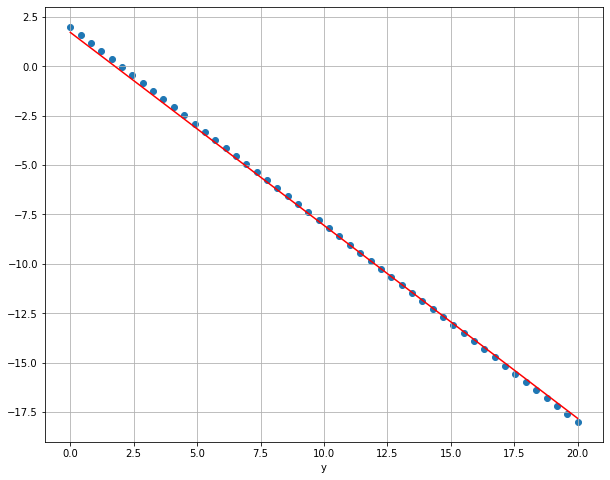

In [118]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [119]:
alpha = 0.005
beta = 0.9
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = RMSProp(X, y, beta, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
 -10.34580036 -10.70824434 -11.07068831 -11.43313228 -11.79557626
 -12.15802023 -12.5204642  -12.88290818 -13.24535215 -13.60779612
 -13.97024009 -14.33268407 -14.69512804 -15.05757201 -15.42001599
 -15.78245996 -16.14490393 -16.5073479  -16.86979188 -17.23223585]

Error Vector:
 [-1.47248118 -1.42676188 -1.38104259 -1.3353233  -1.28960401 -1.24388471
 -1.19816542 -1.15244613 -1.10672684 -1.06100754 -1.01528825 -0.96956896
 -0.92384967 -0.87813038 -0.83241108 -0.78669179 -0.7409725  -0.69525321
 -0.64953391 -0.60381462 -0.55809533 -0.51237604 -0.46665674 -0.42093745
 -0.37521816 -0.32949887 -0.28377957 -0.23806028 -0.19234099 -0.1466217
 -0.10090241 -0.05518311 -0.00946382  0.03625547  0.08197476  0.12769406
  0.17341335  0.21913264  0.26485193  0.31057123  0.35629052  0.40200981
  0.4477291   0.4934484   0.53916769  0.58488698  0.63060627  0.67632556
  0.72204486  0.76776415]

j =  0.2797259267936013

Gradient Vector:
 [[-0.35235851]


In [120]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9948527107478715


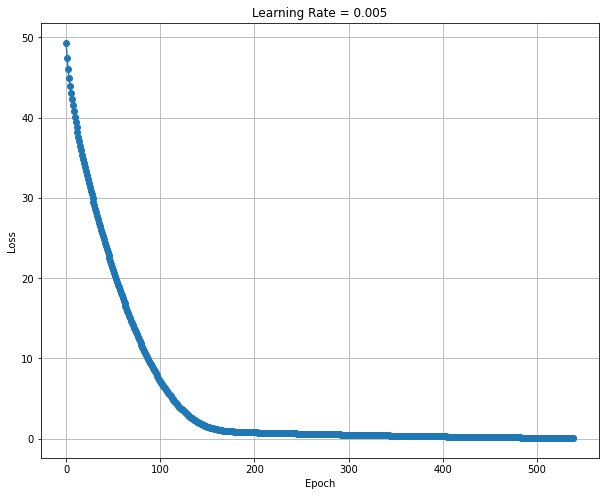

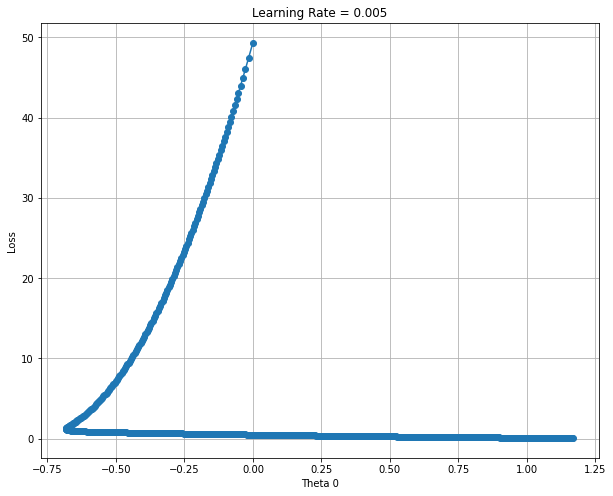

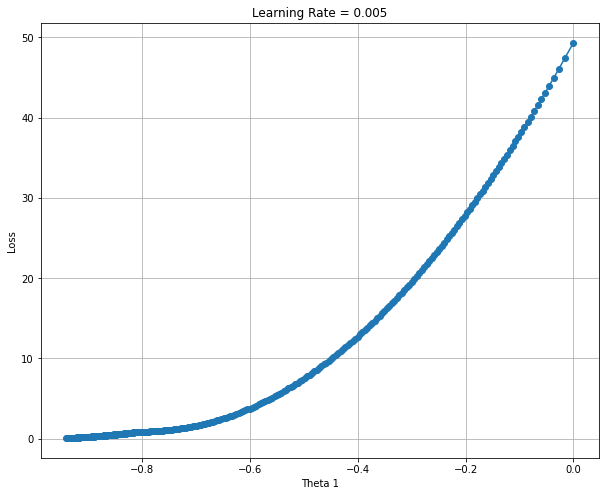

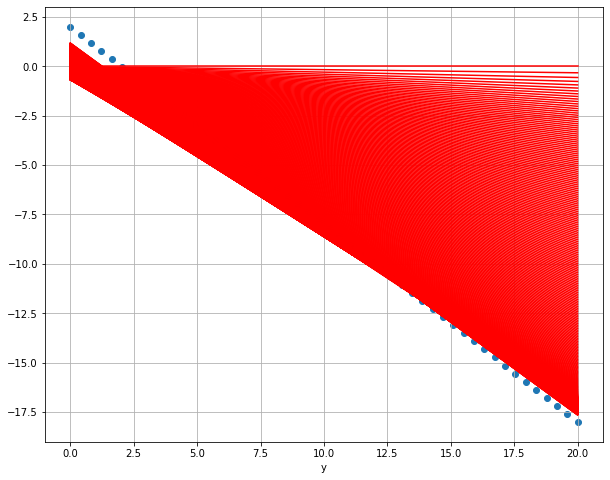

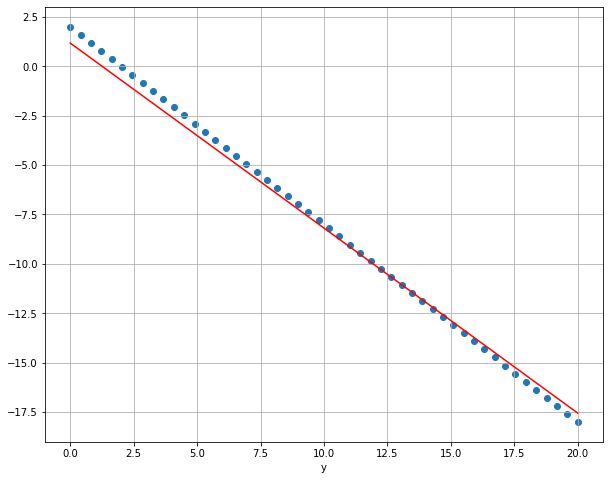

In [121]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [122]:
alpha = 0.0005
beta = 0.9
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = RMSProp(X, y, beta, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.

theta_0_new -0.7151393170729903
theta_1_new -0.7299007787233694

****************** Epoch 1473 ********************

h(x): [ -0.71513932  -1.013058    -1.31097669  -1.60889537  -1.90681406
  -2.20473274  -2.50265143  -2.80057011  -3.0984888   -3.39640748
  -3.69432617  -3.99224485  -4.29016354  -4.58808222  -4.88600091
  -5.18391959  -5.48183828  -5.77975697  -6.07767565  -6.37559434
  -6.67351302  -6.97143171  -7.26935039  -7.56726908  -7.86518776
  -8.16310645  -8.46102513  -8.75894382  -9.0568625   -9.35478119
  -9.65269987  -9.95061856 -10.24853724 -10.54645593 -10.84437461
 -11.1422933  -11.44021198 -11.73813067 -12.03604935 -12.33396804
 -12.63188672 -12.92980541 -13.2277241  -13.52564278 -13.82356147
 -14.12148015 -14.41939884 -14.71731752 -15.01523621 -15.31315489]

Error Vector:
 [-2.71513932 -2.60489474 -2.49465016 -2.38440558 -2.274161   -2.16391642
 -2.05367184 -1.94342726 -1.83318268 -1.7229381  -1.61269352 -1.50244894
 -

In [123]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9476184845511563


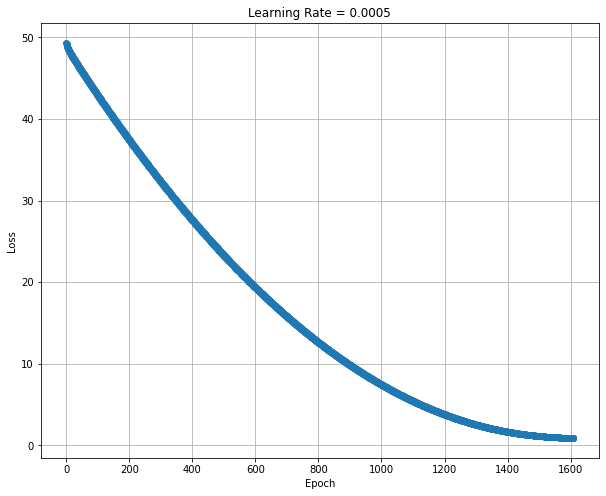

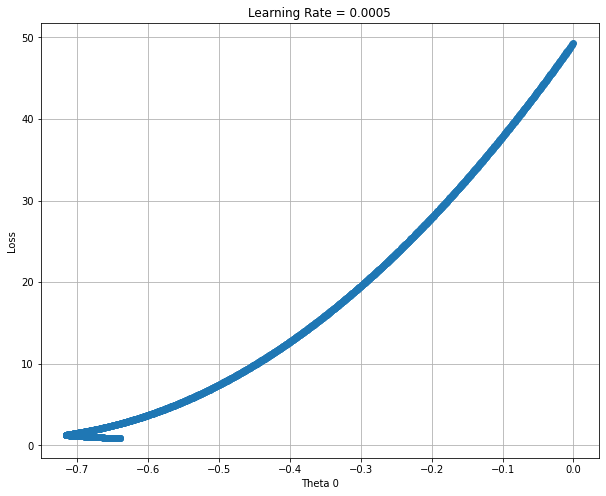

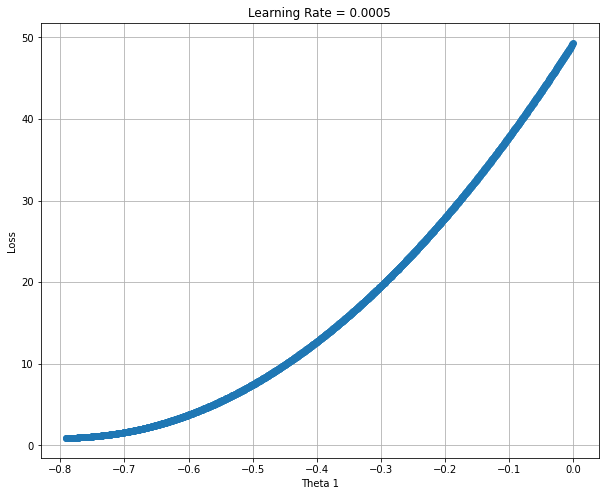

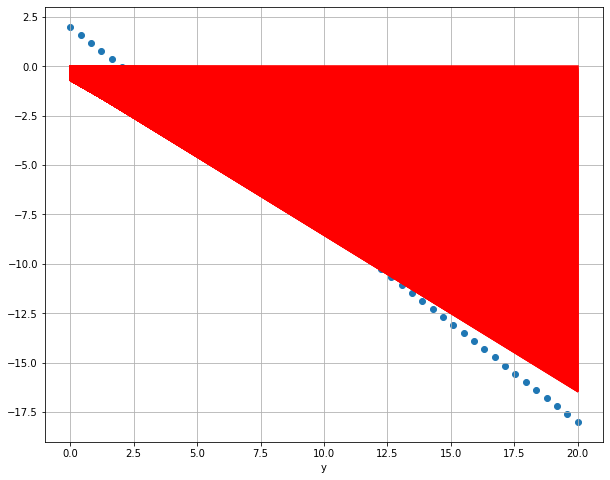

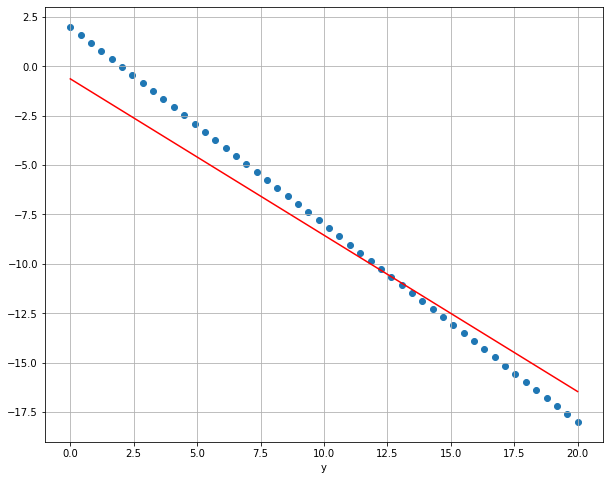

In [124]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [125]:
def Adam(X, y, beta1, beta2, alpha, epsilon, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    v_0_hat = 0
    v_1_hat = 0
    m_0 = 0
    m_1 = 0
    m_0_hat = 0
    m_1_hat = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        m_0 = (beta*m_0) + ((1-beta_1) * d_theta_0)
        m_1 = (beta*m_1) + ((1-beta_1) * d_theta_1)
        
        m_0_hat = m_0 / (1 - beta_1)
        m_1_hat = m_1 / (1 - beta_1)
        
        v_0 = (beta*v_0) + ((1-beta_2) * (d_theta_0**2))
        v_1 = (beta*v_1) + ((1-beta_2) * (d_theta_1**2))

        v_0_hat = v_0 / (1 - beta_2)
        v_1_hat = v_1 / (1 - beta_2)

        theta_0 = theta_0 - ( alpha / ( np.sqrt(v_0_hat) + epsilon ) * m_0_hat )
        theta_1 = theta_1 - ( alpha / ( np.sqrt(v_1_hat) + epsilon ) * m_1_hat )

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print(f'm_0_{i} : ', m_0)
        print(f'm_1_{i} : ', m_1)

        print()
        print(f'm_0_{i}_corrected : ', m_0_hat)
        print(f'm_1_{i}_corrected : ', m_1_hat)
        print()

        print(f'v_0_{i} : ', v_0)
        print(f'v_1_{i} : ', v_1)
        print()

        print(f'v_0_{i}_corrected : ', v_0_hat)
        print(f'v_1_{i}_corrected : ', v_1_hat)
        print()



    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [126]:
alpha = 0.05
beta_1 = 0.05
beta_2 = 0.7
epsilon = 1e-08
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

m_0_0 :  7.6
m_1_0 :  108.9591836734694

m_0_0

In [127]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9958268588074394


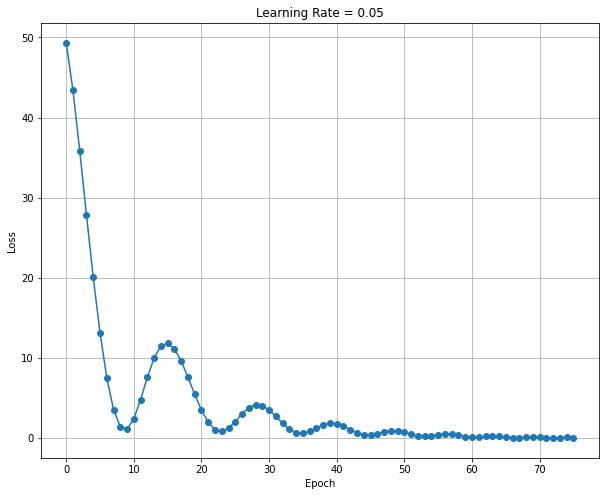

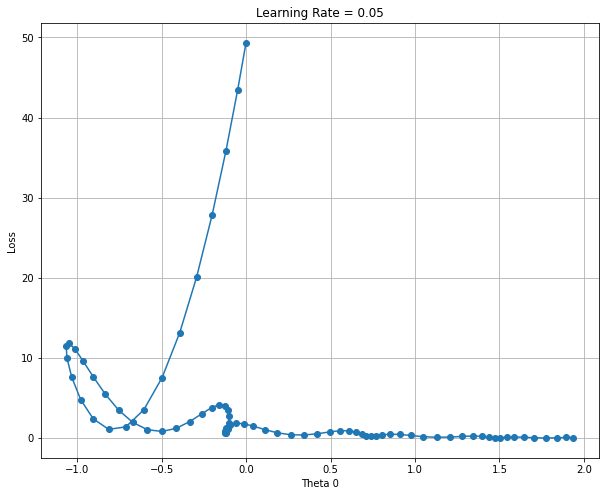

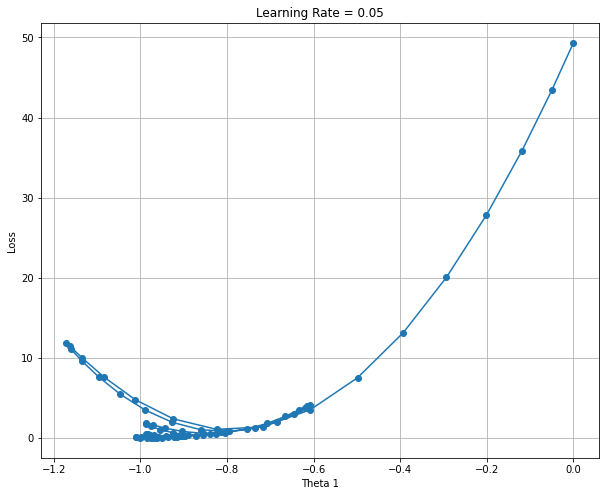

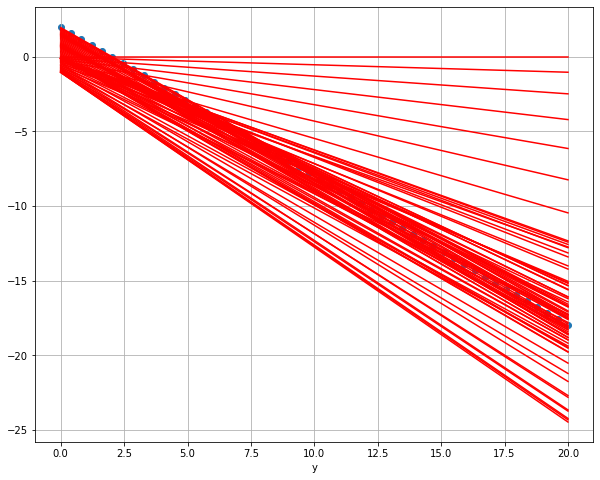

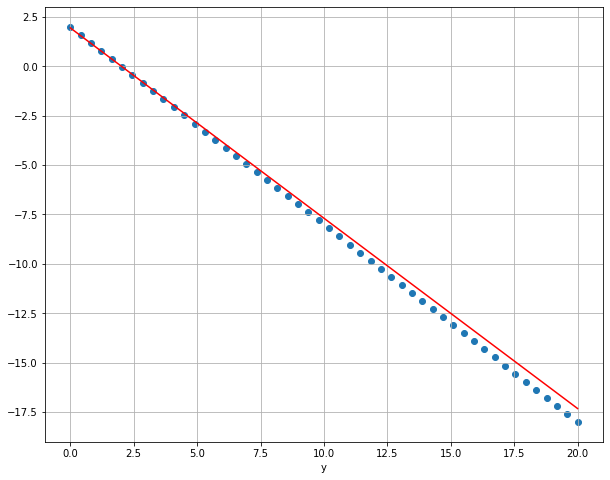

In [128]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [129]:
alpha = 0.005
beta_1 = 0.5
beta_2 = 0.8
epsilon = 1e-08
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

m_0_0 :  4.0
m_1_0 :  57.34693877551021

m_0_0

In [130]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.949274806775609


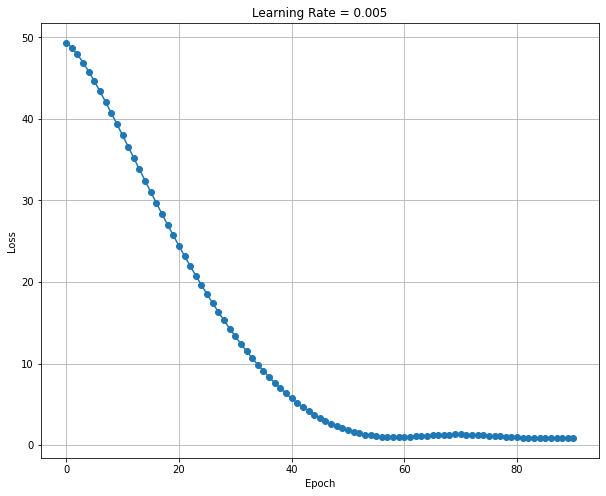

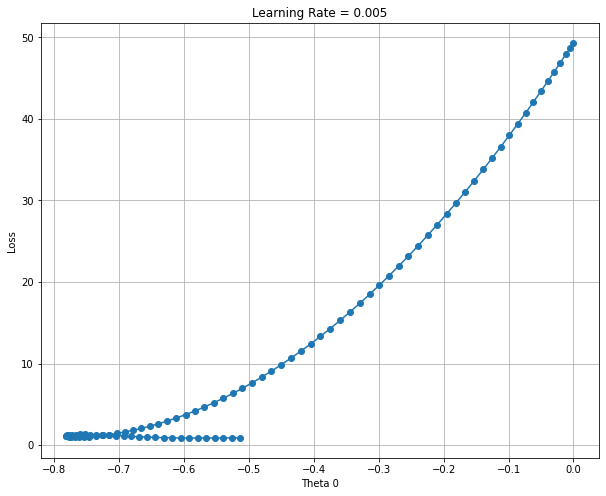

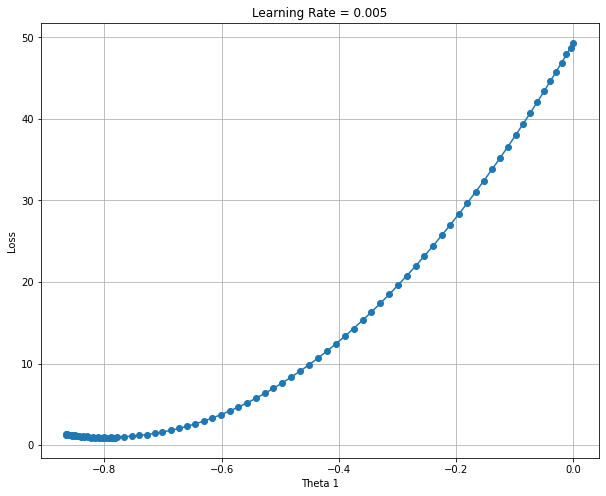

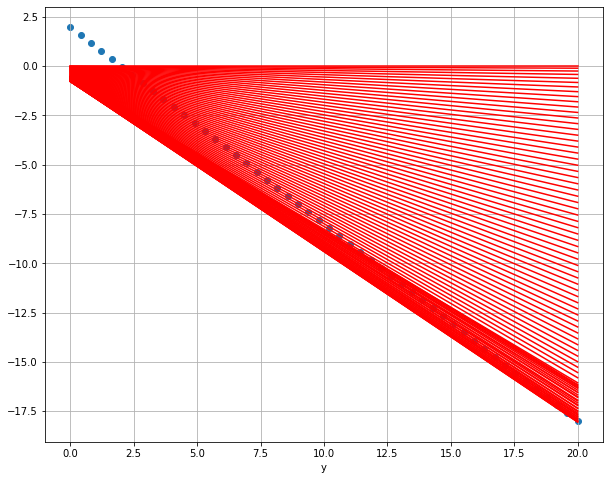

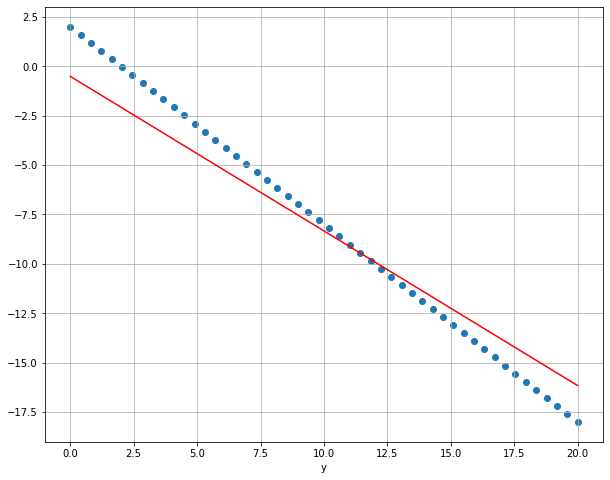

In [131]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [132]:
alpha = 0.0005
beta_1 = 0.8
beta_2 = 0.8
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.

m_0_407 :  2.353731483804193
m_1_407 :  49.88291590239004

m_0_407_corrected :  11.768657419020967
m_1_407_corrected :  249.41457951195025

v_0_407 :  2.8241370236097847
v_1_407 :  1253.5167702424856

v_0_407_corrected :  14.120685118048927
v_1_407_corrected :  6267.583851212429
****************** Epoch 408 ********************

h(x): [ -0.63568828  -0.89531006  -1.15493185  -1.41455363  -1.67417542
  -1.93379721  -2.19341899  -2.45304078  -2.71266256  -2.97228435
  -3.23190613  -3.49152792  -3.7511497   -4.01077149  -4.27039327
  -4.53001506  -4.78963684  -5.04925863  -5.30888042  -5.5685022
  -5.82812399  -6.08774577  -6.34736756  -6.60698934  -6.86661113
  -7.12623291  -7.3858547   -7.64547648  -7.90509827  -8.16472006
  -8.42434184  -8.68396363  -8.94358541  -9.2032072   -9.46282898
  -9.72245077  -9.98207255 -10.24169434 -10.50131612 -10.76093791
 -11.0205597  -11.28018148 -11.53980327 -11.79942505 -12.05904684
 -12.31866862 -12.

In [133]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9468780700321544


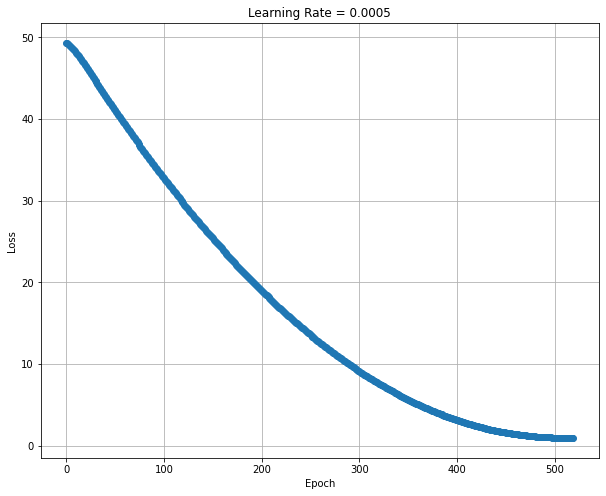

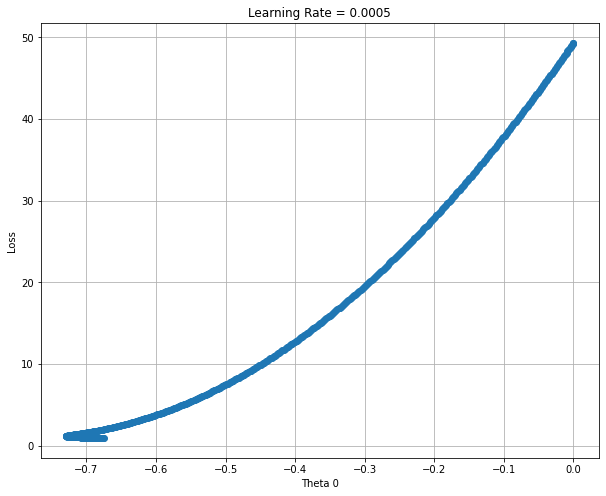

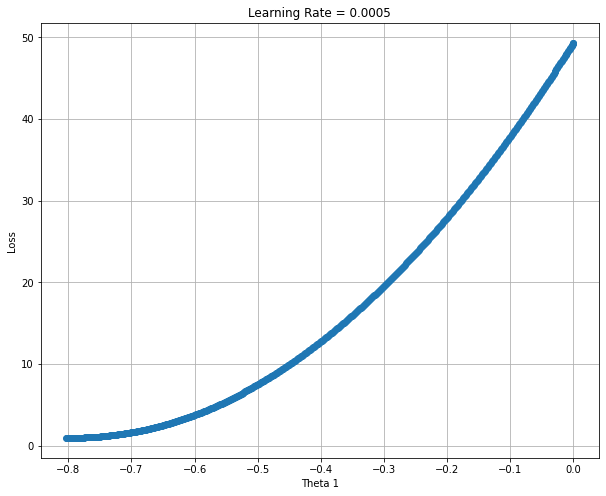

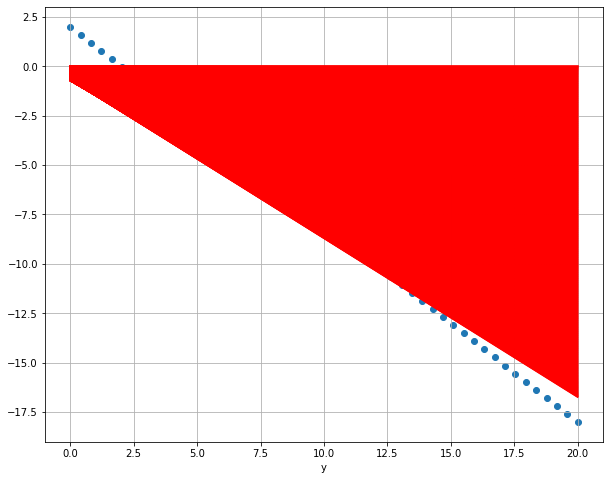

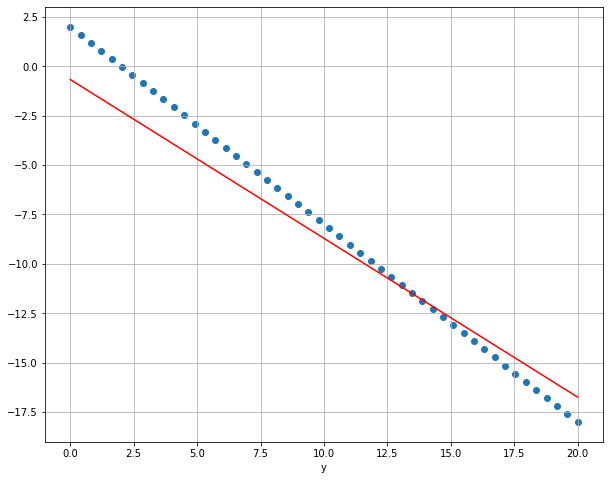

In [134]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [135]:
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
v_1_155_corrected :  25630.83589007428
****************** Epoch 156 ********************

h(x): [-0.47535573 -0.66947498 -0.86359424 -1.0577135  -1.25183276 -1.44595202
 -1.64007127 -1.83419053 -2.02830979 -2.22242905 -2.41654831 -2.61066757
 -2.80478682 -2.99890608 -3.19302534 -3.3871446  -3.58126386 -3.77538311
 -3.96950237 -4.16362163 -4.35774089 -4.55186015 -4.7459794  -4.94009866
 -5.13421792 -5.32833718 -5.52245644 -5.7165757  -5.91069495 -6.10481421
 -6.29893347 -6.49305273 -6.68717199 -6.88129124 -7.0754105  -7.26952976
 -7.46364902 -7.65776828 -7.85188753 -8.04600679 -8.24012605 -8.43424531
 -8.62836457 -8.82248383 -9.01660308 -9.21072234 -9.4048416  -9.59896086
 -9.79308012 -9.98719937]

Error Vector:
 [-2.47535573 -2.26131172 -2.04726771 -1.8332237  -1.6191797  -1.40513569
 -1.19109168 -0.97704768 -0.76300367 -0.54895966 -0.33491565 -0.12087165
  0.09317236  0.30721637  0.52126037  0.73530438  0.94934839  1.1633924
  1.37743

In [136]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9460401698712304


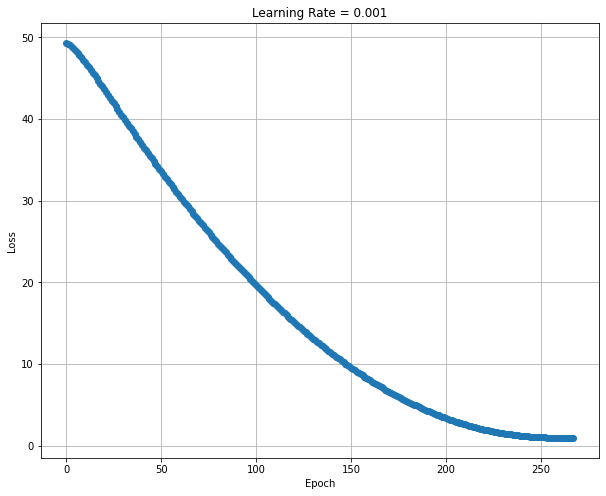

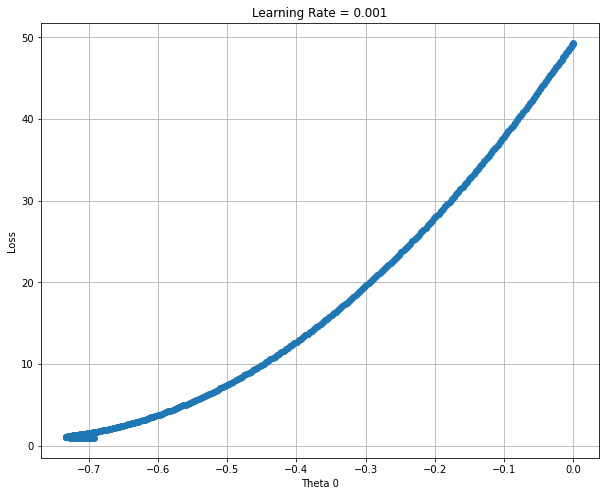

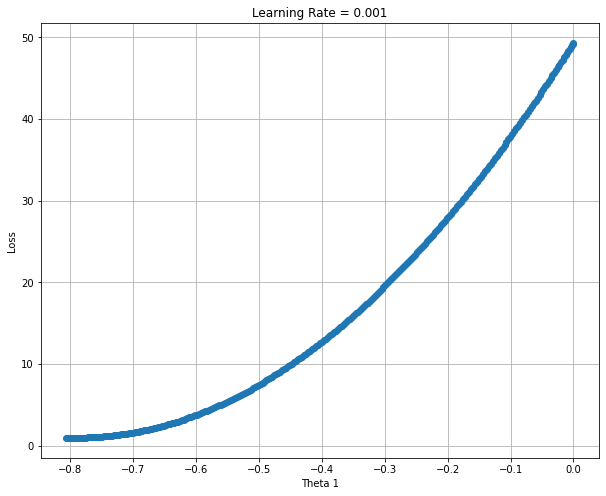

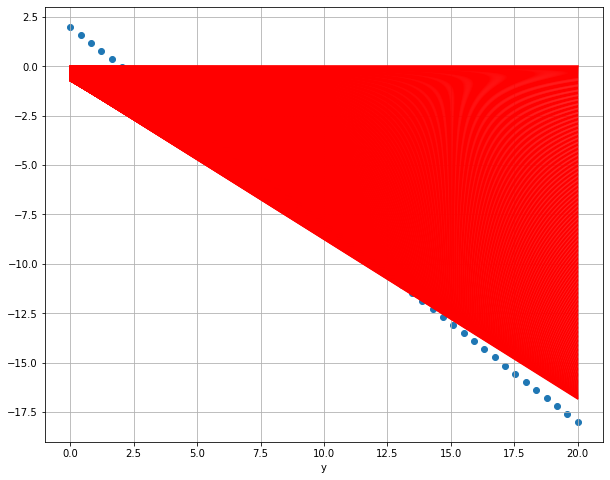

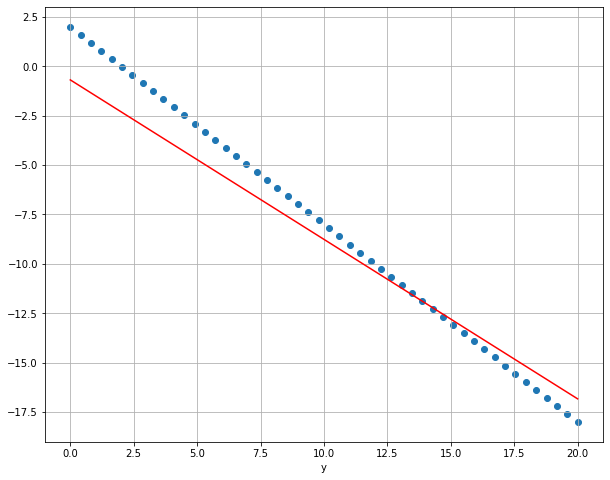

In [137]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [138]:
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.5
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
v_1_155_corrected :  25630.835890074286
****************** Epoch 156 ********************

h(x): [-0.47535573 -0.66947498 -0.86359424 -1.0577135  -1.25183276 -1.44595202
 -1.64007127 -1.83419053 -2.02830979 -2.22242905 -2.41654831 -2.61066757
 -2.80478682 -2.99890608 -3.19302534 -3.3871446  -3.58126386 -3.77538311
 -3.96950237 -4.16362163 -4.35774089 -4.55186015 -4.7459794  -4.94009866
 -5.13421792 -5.32833718 -5.52245644 -5.7165757  -5.91069495 -6.10481421
 -6.29893347 -6.49305273 -6.68717199 -6.88129124 -7.0754105  -7.26952976
 -7.46364902 -7.65776828 -7.85188753 -8.04600679 -8.24012605 -8.43424531
 -8.62836457 -8.82248383 -9.01660308 -9.21072234 -9.4048416  -9.59896086
 -9.79308012 -9.98719937]

Error Vector:
 [-2.47535573 -2.26131172 -2.04726771 -1.8332237  -1.6191797  -1.40513569
 -1.19109168 -0.97704768 -0.76300367 -0.54895966 -0.33491565 -0.12087165
  0.09317236  0.30721637  0.52126037  0.73530438  0.94934839  1.1633924
  1.3774

In [139]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9460401698712304


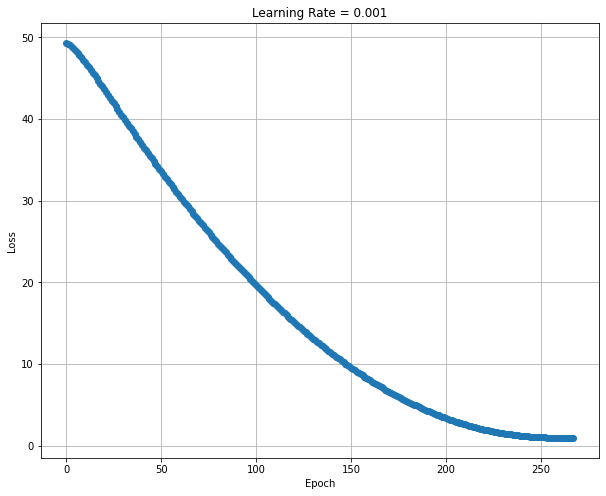

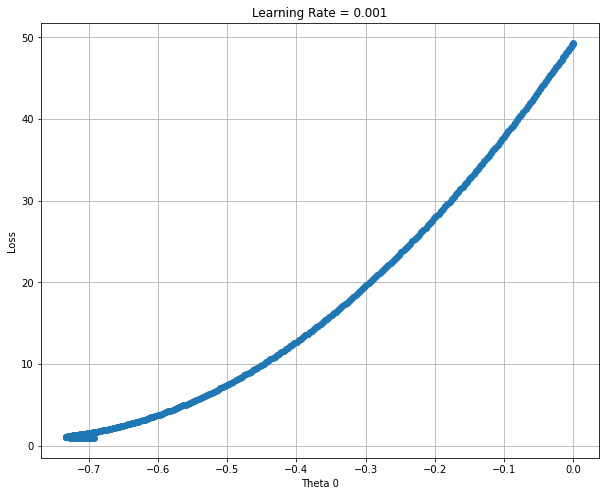

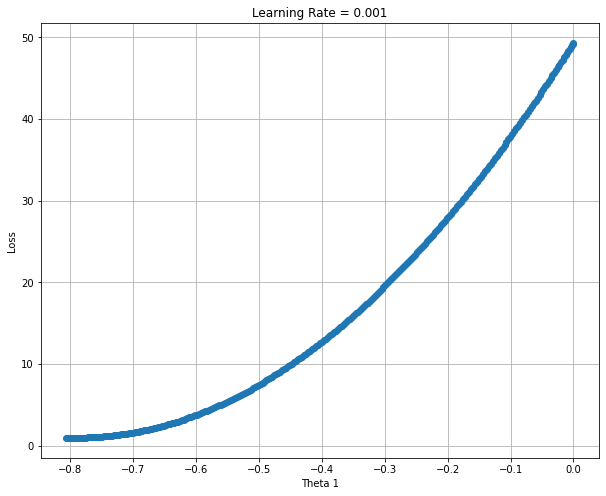

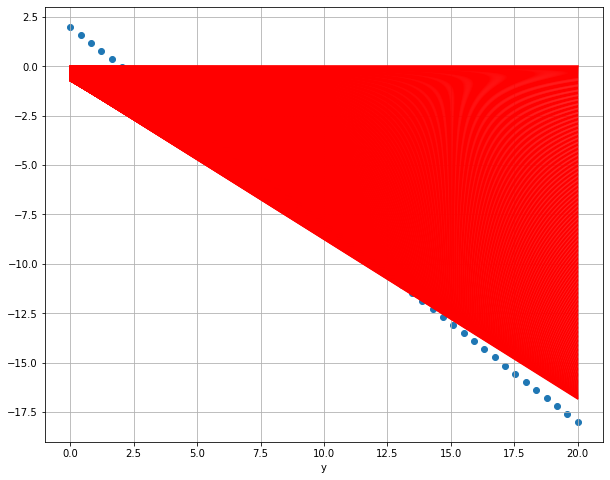

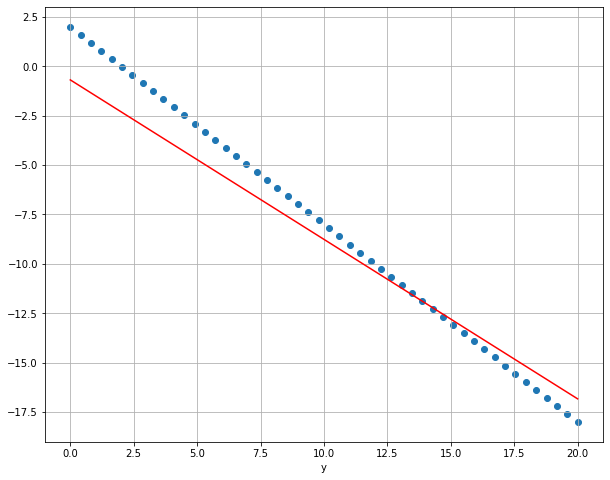

In [140]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [141]:
alpha = 0.001
beta_1 = 0.5
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
v_1_155_corrected :  25630.83589007428
****************** Epoch 156 ********************

h(x): [-0.47535573 -0.66947498 -0.86359424 -1.0577135  -1.25183276 -1.44595202
 -1.64007127 -1.83419053 -2.02830979 -2.22242905 -2.41654831 -2.61066757
 -2.80478682 -2.99890608 -3.19302534 -3.3871446  -3.58126386 -3.77538311
 -3.96950237 -4.16362163 -4.35774089 -4.55186015 -4.7459794  -4.94009866
 -5.13421792 -5.32833718 -5.52245644 -5.7165757  -5.91069495 -6.10481421
 -6.29893347 -6.49305273 -6.68717199 -6.88129124 -7.0754105  -7.26952976
 -7.46364902 -7.65776828 -7.85188753 -8.04600679 -8.24012605 -8.43424531
 -8.62836457 -8.82248383 -9.01660308 -9.21072234 -9.4048416  -9.59896086
 -9.79308012 -9.98719937]

Error Vector:
 [-2.47535573 -2.26131172 -2.04726771 -1.8332237  -1.6191797  -1.40513569
 -1.19109168 -0.97704768 -0.76300367 -0.54895966 -0.33491565 -0.12087165
  0.09317236  0.30721637  0.52126037  0.73530438  0.94934839  1.1633924
  1.37743

In [142]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9460401698712304


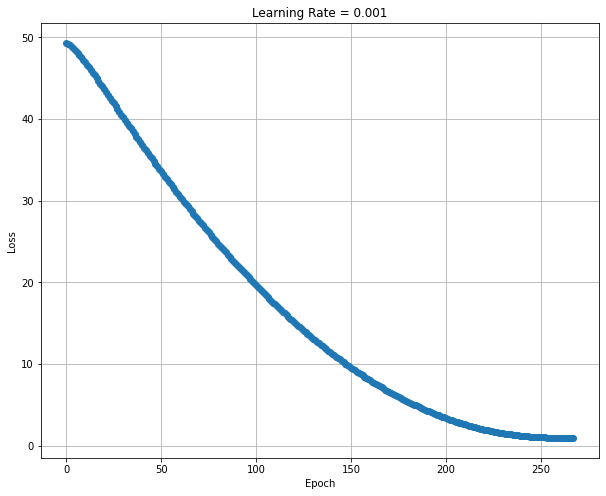

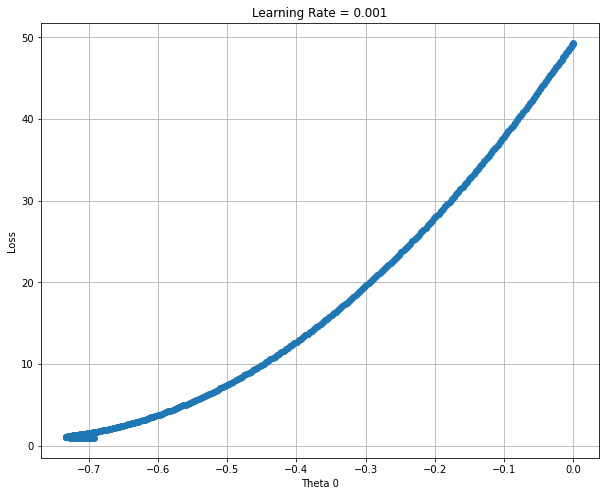

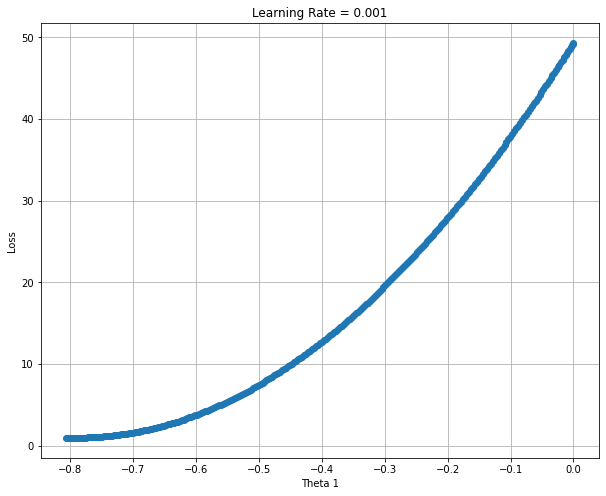

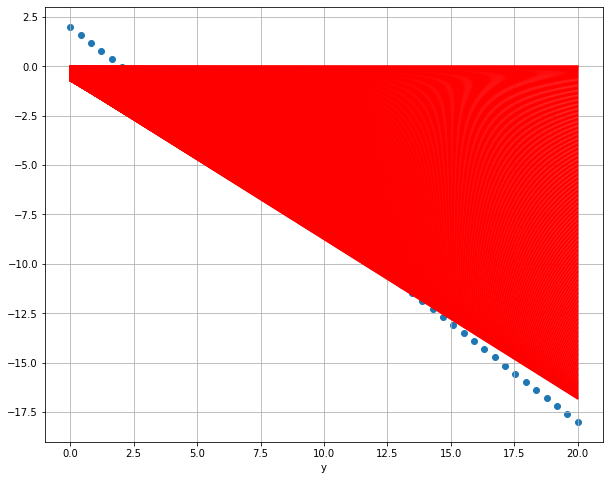

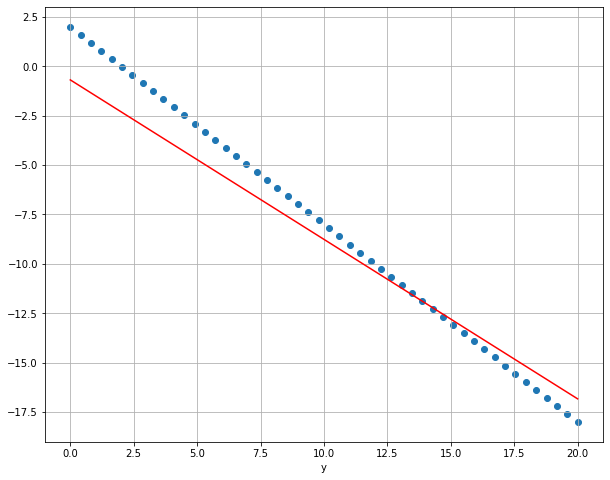

In [143]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [144]:
alpha = 0.001
beta_1 = 0.5
beta_2 = 0.5
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
v_1_155_corrected :  25630.835890074286
****************** Epoch 156 ********************

h(x): [-0.47535573 -0.66947498 -0.86359424 -1.0577135  -1.25183276 -1.44595202
 -1.64007127 -1.83419053 -2.02830979 -2.22242905 -2.41654831 -2.61066757
 -2.80478682 -2.99890608 -3.19302534 -3.3871446  -3.58126386 -3.77538311
 -3.96950237 -4.16362163 -4.35774089 -4.55186015 -4.7459794  -4.94009866
 -5.13421792 -5.32833718 -5.52245644 -5.7165757  -5.91069495 -6.10481421
 -6.29893347 -6.49305273 -6.68717199 -6.88129124 -7.0754105  -7.26952976
 -7.46364902 -7.65776828 -7.85188753 -8.04600679 -8.24012605 -8.43424531
 -8.62836457 -8.82248383 -9.01660308 -9.21072234 -9.4048416  -9.59896086
 -9.79308012 -9.98719937]

Error Vector:
 [-2.47535573 -2.26131172 -2.04726771 -1.8332237  -1.6191797  -1.40513569
 -1.19109168 -0.97704768 -0.76300367 -0.54895966 -0.33491565 -0.12087165
  0.09317236  0.30721637  0.52126037  0.73530438  0.94934839  1.1633924
  1.3774

In [145]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9460401698712304


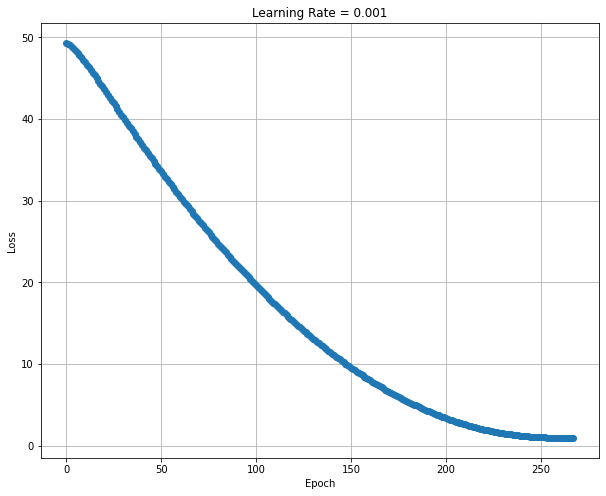

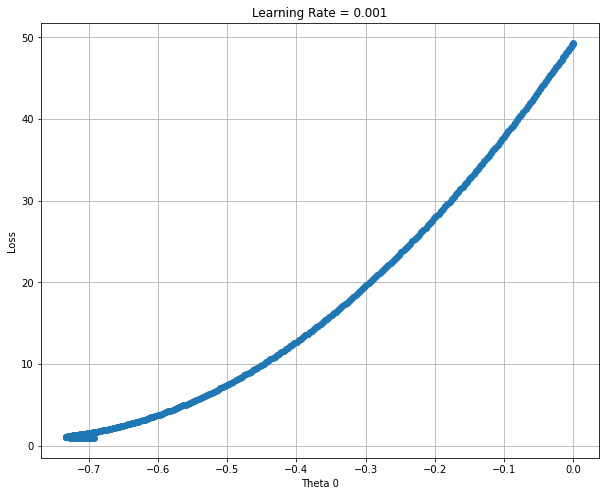

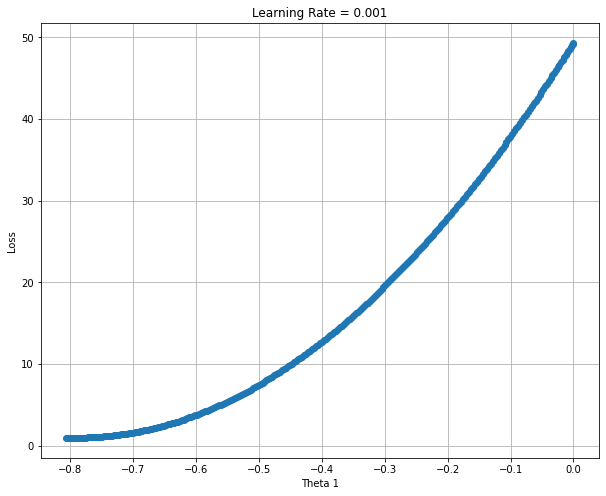

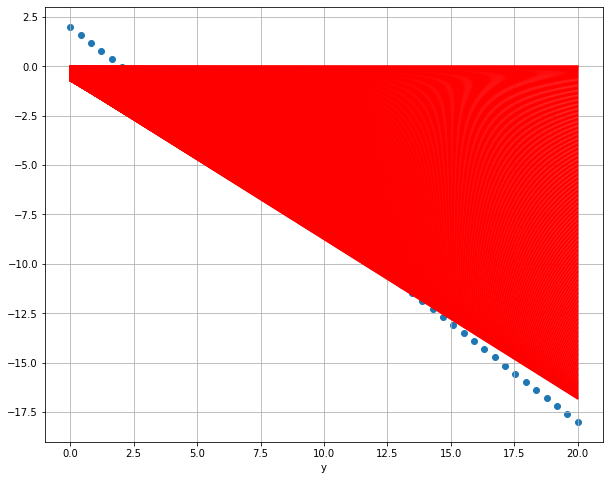

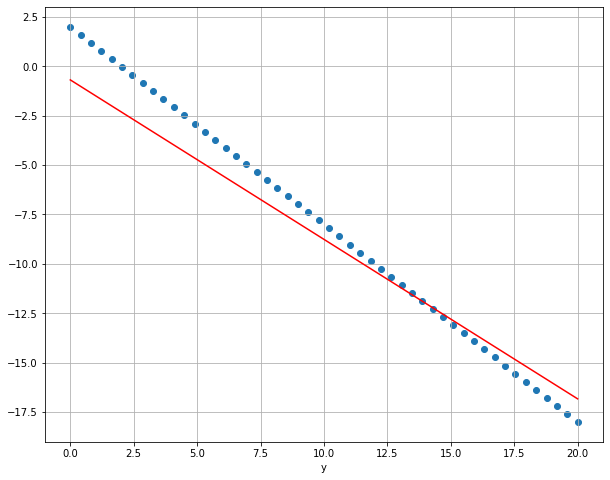

In [146]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [147]:
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam(X, y, beta_1, beta_2, alpha, epsilon, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

m_0_0 :  0.7999999999999998
m_1_0 :  11.469387

In [148]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.9603097968964857


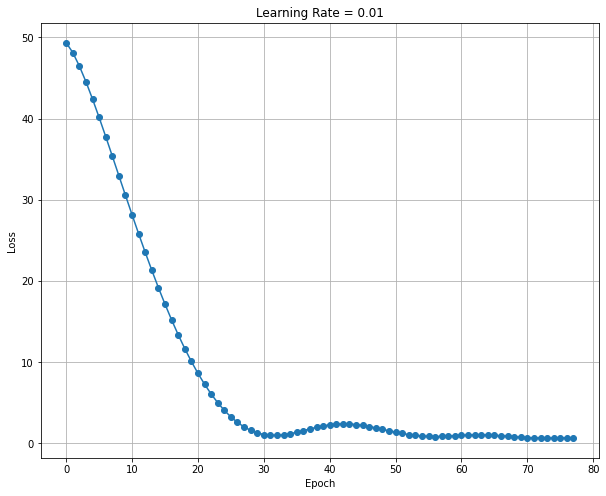

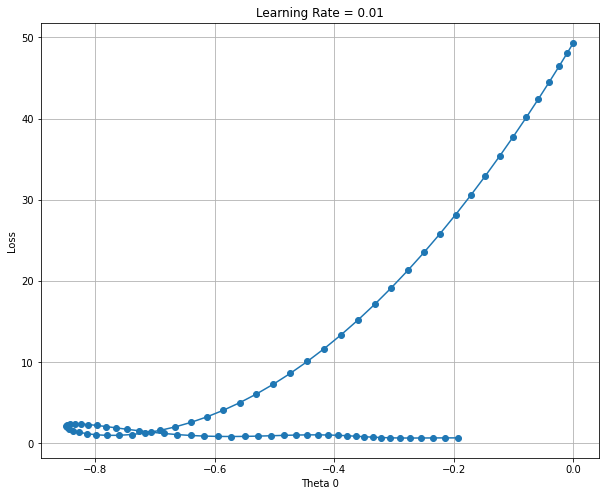

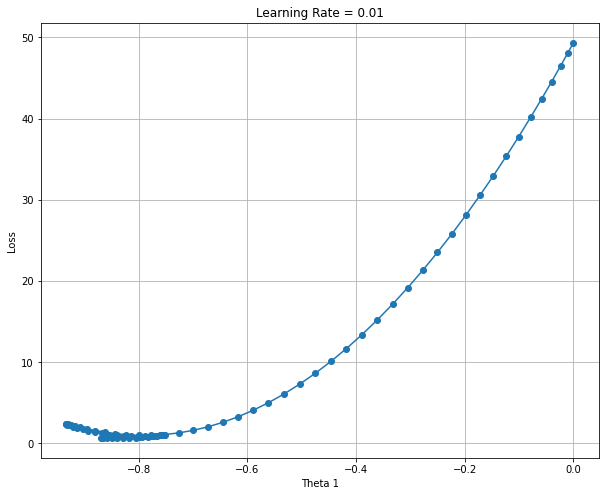

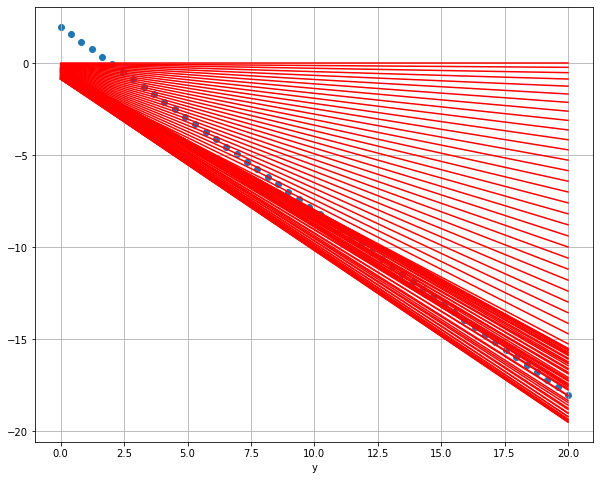

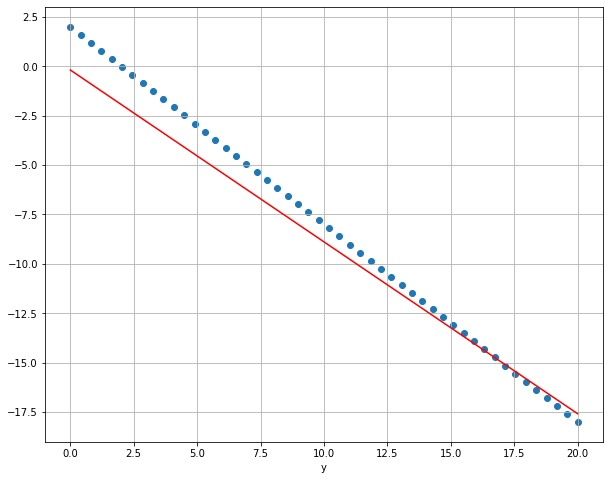

In [149]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

## Congratulations 
![image.png](attachment:image.png)